# The Probability Mass Function /Frequency Function

The PMF is a function that associates probabilites with discrete random variables.\

The discrete part in discrete distributions means that there is a known number of possible otcomes.

The Probability Mass Function(PMF) maps a probability (P) of observing an outccome x of our discrete variable X in a way that this function takes the form\
$f(x) = P(X = x)$.

### PMF Intuition

To convert any random variable's frequency into a probability, we need to;
1. Get the frequency of every possible value in a dataset.
2. Divide the frequency of eaach value by the total number of values(length of dataset)
3. Get the probability for each value.

##### 1. Get the frequency of every possible value in a dataset

In [1]:
# Count the frequency of values in a given dataset
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)

print(len(x))

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
13


##### 2. Divide the frequency of each value by the total number of values

The above returned a dictionary, with the keys being the outcome and values the frequency.

In [2]:
counter.items()

dict_items([(1, 4), (2, 4), (3, 2), (4, 1), (5, 2)])

In [3]:
# Convert frequency to probability - divide each frequency value by total number of values
#Create an empty list to capture iterated figures
pmf = []
#.items() returns a view object that contains the key-value pairs of a dictionary as tuples. 
#Iterate through the tuple to have a key and value
# Each tuple contains a key-value pair from the dictionary.
#Separate the tuple to have the values to iterate over
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
print(counter.keys(), pmf)

dict_keys([1, 2, 3, 4, 5]) [0.31, 0.31, 0.15, 0.08, 0.15]


In [4]:
import numpy as np
#The PMF is normalized so the total probability is 1
np.array(pmf).sum()

1.0

To make the above a function, which is "trained" using the global variables `x` and `counter` we have already declared.:


In [5]:
def p(x_i):
    frequency = counter[x_i]
    total_number = len(x)
    return frequency / total_number

print("p(1) =", p(1))
print("p(3) =", p(3))

p(1) = 0.3076923076923077
p(3) = 0.15384615384615385


#### Visualizing a PMF

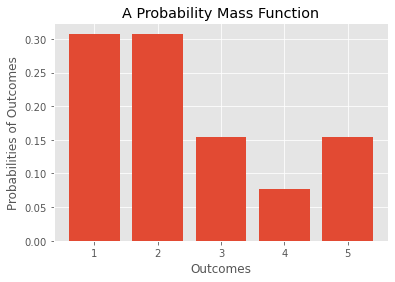

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

outcomes = counter.keys()

plt.bar(outcomes, [p(x_i) for x_i in outcomes]);
plt.title("A Probability Mass Function")
plt.xlabel("Outcomes")
plt.ylabel("Probabilities of Outcomes");

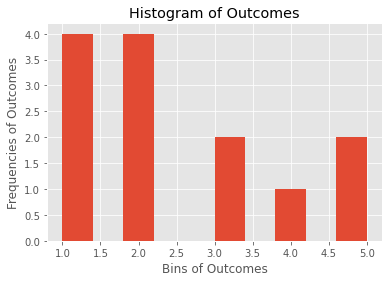

In [7]:
plt.hist(x);
plt.title("Histogram of Outcomes")
plt.xlabel("Bins of Outcomes")
plt.ylabel("Frequencies of Outcomes");

#### Differences between histogram and bar graph of PMF
1. In the PMF graph, the y-axis represents the probabilities, whereas the histogram, it represents the frequency = counter.values()
2. In the histogram, x-values have been translated into bins along acontinuous x axix rather than a series of categorigal lables like the bar graph.
#### Why compare bar graph and histogram
- A PMF is designed to work with discrete(categorical) data, no binning, counting or normolization is needed to display the probability of each possible x value.
- Histograms are used with continuous data to show frequencies.

### Measures of Central Tendency and Spread
#### Expected Value / Mean
For discrete distributions, the expected value of a discrete random value x is given by;
$$\large E(X) = \mu = \sum_i p(x_i)x_i$$

Example\
Data = [2,5,5]\
Calculate the probability of each number 1st\
- P(2) = 1 / 3\
- P(5) = 2 / 3\

Multiply each by the value
- P(2) ~ 2 * 1 / 3 = 2 / 3
- P(5) ~ 5 * 2 / 3 = 10 / 3

The sum of them\
2 / 3 + 10 / 3 = 12 / 3 = 4

Thus the mean is 4


### Variance
The variance is given by;
$$\large E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$

The variance is the sum of the probabilities of each $x_i$ times the squared difference between that $x_i$ and the expected value.\
The standard deviation is the square root of the variance.

#### Examples


In [8]:
#From the dataset above
print('The dataset', x)
#The outcomes of the above dataseets
print('The outcomes of x', outcomes)
print('The probability of 4 is', p(4))

The dataset [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5]
The outcomes of x dict_keys([1, 2, 3, 4, 5])
The probability of 4 is 0.07692307692307693


To calculate the expected value and variance;\
Mean
$$\large E(X) = \mu = \sum_i p(x_i)x_i$$
Variance
$$\large E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$

In [9]:
mu = sum([p(x_i)*x_i for x_i in outcomes])
print('The expected value is:',  mu)
variance = sum([p(x_i)*((x_i - mu)**2) for x_i in outcomes])
print('The variance is', variance)

The expected value is: 2.4615384615384617
The variance is 1.940828402366864


The following table shows all of the intermediate steps being calculated here:

| Formula     | Name     | `i=0`  | `i=1`  | `i=2`  | `i=3`  | `i=4`  | $\sum$ |
| ----------- | -------- | ------ | ------ | ------ | ------ | ------ | ------ |
|<img width=100/>|<img width=150/>|<img width=80/>|<img width=80/>|<img width=80/>|<img width=80/>|<img width=80/>|<img width=100/>|
| $x_i$       | outcome   | 1      | 2      | 3      | 4      | 5      |        |
| $p(x_i)$    | probability | $0.31$ | $0.31$ | $0.15$ | $0.08$ | $0.15$ | $1$ (i.e. $P(\Omega)$) 
| $p(x_i)x_i$ |  | $0.31$  | $0.62$  | $0.46$ | $0.31$  |$0.77$   |  $2.46$ (i.e. $\mu$)  |
| $(x_i-\mu)^2$| squared difference from the mean | $2.14$ | $0.213$ | $0.300$ | $2.37$ | $6.44$ |
| $ p(x_i)(x_i-\mu)^2$|  | $0.657$ | $0.0655$ | $0.0446$ |$0.182$ | $0.991$ | $1.94$ (i.e. $\sigma^2$) |



As you can see from the far right column, the expected value is equal to 2.46 and the variance is equal to 1.94. This matches up with our previously-computed values.

# LABS

# The Probability Mass Function - Lab

In this lab you'll apply what you previously learned about probability mass functions (PMFs) to explore the *class size paradox*. The class size paradox describes apparent contradictory findings where a total allocation of resources is fixed. 

The idea behind this paradox is that there is a difference in how events are actually distributed and how events are perceived to be distributed. These types of divergence can have important consequences for data analysis. Probability mass functions can help resolve some of these situations, as you'll learn below.

## Objectives

You will be able to:

* Explain the class size paradox
* Create visualizations to visually compare actual and biased observations 
* Calculate the mean from PMFs to identify the expected value


## The Problem 

At a university, the expected student-to-teacher ratio is 32.5 : 1. But randomly interviewed students often feel that their average class size is bigger than 32.5. There are two main reasons for this:

1. Students typically take 4 - 5 classes at any given time, but teachers usually only teach 1 or 2 classes.
2. The number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students (and sampling randomly), it is expected we will come across _more_ students from larger classes simply because there are more of them.

Let's work through a set of data to recreate and analyze this paradox. 

Suppose that a college offers 74 classes in a term. We can start with the following distribution of sizes and counts:

| Class size |  Class count |
|--------|------|
|15-19|	10|
|20-24|	10|
|25-29|	18|
|30-34|	6|
|35-39|	8|
|40-44|	10|
|45-49|	5|
|50-54|	3|
|55-59| 4|

If the campus manager were asked about the average class size, he would perform the following tasks:

1. Construct a PMF from given data
2. Compute the mean using the PMF

Let's follow the management approach first and see what expected value we get from our PMF. Here is a `size_and_count` dictionary to get you started. Calculate the PMF from this data as we have done before.

To make it slightly more straightforward, we have averaged the class sizes for each class, i.e. for size "15 - 19", we use the average value, 17. This allows us to treat each row of the table above as a single discrete category, represented by the average value of the category.

In [10]:
size_and_count = {17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4}

Following the approach seen in the previous lesson, calculate a list of PMF values by normalizing each size.

(Treat the `size_and_count` dictionary as the equivalent of the `counter` variable from the previous lesson — you do not need to count the raw data values because it has already been done for you, but the logic to find the total number of classes will be a bit more elaborate because you don't have access to the raw data.)

We will also use this an an opportunity to practice using pandas, which has convenient built-in methods and broadcasting.

In [11]:
import numpy as np
import pandas as pd

# Determine total number of classes (integer value)
sum_class = sum(size_and_count.values())

# Create a pandas Series of all possible outcomes (class sizes)
sizes = pd.Series(size_and_count.keys())

# Divide each class size value by the total number of classes
# to create a pandas Series of PMF values
actual_pmf = pd.Series([value/sum_class for value in size_and_count.values()])

# Display probabilities in a dataframe
pmf_df = pd.concat([sizes, actual_pmf], axis=1)
pmf_df.columns = ["Class Size", "Overall Probability"]
pmf_df.style.hide_index()

Class Size,Overall Probability
17,0.135135
22,0.135135
27,0.243243
32,0.081081
37,0.108108
42,0.135135
47,0.067568
52,0.040541
57,0.054054


As an additional check, these probability values must sum to 1. Let's check for that. Run the following cell: 

In [12]:
# The output should be 1
actual_pmf.sum()

1.0

Because this is a dataframe, we can use the built-in `.plot.bar` method to view the class sizes as a bar graph:

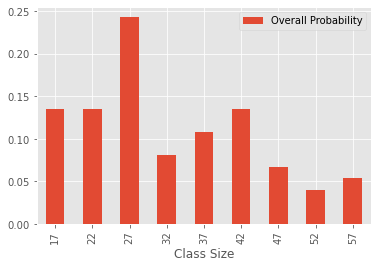

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pmf_df.plot.bar(x="Class Size", y="Overall Probability");

Let's also write the PMF as a Python function `p_actual`. Meaning, it takes in a given $x_i$ value (a class size) and returns the probability of that outcome from the management perspective.

You can use the global variables `size_and_count` and `sum_class`.

In [14]:
def p_actual(x_i):
    frequency = size_and_count[x_i]
    total_number = sum_class
    return frequency / total_number
    
    # Your code here

p_actual(17) # 0.13513513513513514

0.13513513513513514

## Calculate the Mean or Expected Value $E(X)$

We can now calculate the mean or **Expected Value** for this distribution.

>The mean $\mu$ or expected value **E(X)** of a random variable $X$ is the sum of the possible values for $X$ weighted by their respective probabilities.

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

In simple terms, you have to multiply each element in the sizes list by their probability of occurrence then sum the resulting values.

We can do this in one line of code using pandas broadcasting. (E.g. `sizes.apply(p_actual)` will result in a series containing all $p(x_i)$ values.)

In [15]:
# Calculate the expected value (mu) using formula above
mu = (sizes.apply(p_actual) * sizes).sum()
mu 

# 32.472972972972975

32.472972972972975

Recall, we expected the average class size to be 32.5. Indeed, the calculation above confirms this.

## Random Student Survey

Next, we conduct a survey on a random group of students about their class sizes and then compute the mean. Paradoxically, we observed that the average class is bigger than 32.5. How did this happen? Let's see this in action below:

First, let's compute a distribution as a likely observation **by students**, where the probability associated with each class size is "biased" by the **number of students** in the class. If this sounds confusing, think of it this way: instead of calculating a PMF using the counts of class sizes, calculate it using the counts of students.

Perform the following tasks to introduce this bias. 

* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
* Get the sum of biased class sizes

The result is a new PMF that represents the biased distribution.

In [16]:
biased = sizes.apply(p_actual) * sizes
biased

0    2.297297
1    2.972973
2    6.567568
3    2.594595
4    4.000000
5    5.675676
6    3.175676
7    2.108108
8    3.081081
dtype: float64

You can now normalize the new biased list with the sum of its values, just like you did before. 
- Normalize the biased list and calculate the new PMF

In [17]:
biased_pmf = pd.Series([value/mu for value in biased])
biased_pmf

0    0.070745
1    0.091552
2    0.202247
3    0.079900
4    0.123179
5    0.174782
6    0.097794
7    0.064919
8    0.094881
dtype: float64

You can see that probability values in this PMF are different than our original pmf. Note the differences in the table below:

In [18]:
pmf_df["Perceived Probability"] = biased_pmf
pmf_df

,Class Size,Overall Probability,Perceived Probability
0,17,0.135135,0.070745
1,22,0.135135,0.091552
2,27,0.243243,0.202247
3,32,0.081081,0.079900
4,37,0.108108,0.123179
5,42,0.135135,0.174782
6,47,0.067568,0.097794
7,52,0.040541,0.064919
8,57,0.054054,0.094881


Again, we can represent this as a function, this time called `p_perceived`.

In [19]:
def p_perceived(x_i):
    return p_actual(x_i)*x_i / mu

p_perceived(17)

0.07074490220557636

Just like before, you can calculate the expected value $\mu$. This time, use `p_perceived` instead of `p_actual` in your calculation.

In [20]:
mu_biased = (sizes.apply(p_perceived) * sizes).sum()
mu_biased

# 36.51310861423221

36.51310861423221

## Here Is the Paradox 

Here we see it, the average or expected value of biased results comes out higher than the actual values. In some situations, a paradox like this can be mind-boggling. As an extra measure, inspect both PMFs side by side visually to see the differences. 

You can use `.plot.bar` again on `pmf_df`, this time changing the `y` parameter so that both probability distributions will be plotted side-by-side. Your plot should look like this:

![bar graph with two PMFs side by side](side_by_side_graph.png)

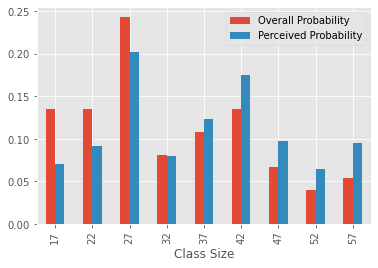

In [21]:
# Your code here
ax = pmf_df.plot.bar(x = 'Class Size', y = ['Overall Probability', 'Perceived Probability'])

Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is ~36.5, which is quite a bit higher than the actual mean of ~32.5.

For an alternative comparison where it is easier to see which value is higher, plot these PMFs on top of each other with semi-transparent bar fill.

Your plot should look like this:

![bar graph with overlapping PMFs](overlapping_semitransparent_graph.png)

Hints:

* You will need call `.plot.bar` twice, and pass in `ax`, so that both plots use the same axes
* Change the parameter `alpha` to adjust the transparency
* If you don't specify a color, both will plot with the default red color and you won't be able to tell which is which. In the above version, "Overall Probability" has a `color` of `"tab:red"` and "Perceived Probability" has a `color` of `"tab:blue"`, but you're free to customize it differently!

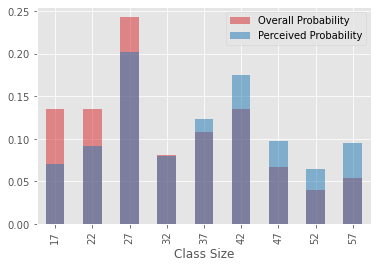

In [22]:
# Setting up shared axes
fig, ax = plt.subplots()

# Your code here
# Plot overall probability in semitransparent red
pmf_df.plot.bar(
    x="Class Size", y="Overall Probability",
    ax=ax,
    alpha=0.5, color="tab:red"
)
# Plot perceived probability in semitransparent blue
pmf_df.plot.bar(
    x="Class Size", y="Perceived Probability",
    ax=ax,
    color="tab:blue", alpha=0.5
);

Here is the key: for smaller class sizes, the probability of coming across a students is lower than the actual probability. For larger classes, the probability of coming across a student is much higher than actual probability. This explains why the paradox takes place!

## Summary 
In this lesson, we looked at a common paradox called the "class size paradox", which deals with differences in observation by different people based on their circumstances. 

Note that this phenomenon is not just limited to class sizes. It applies to many scenarios where people are grouped together, such as in the context of social networks. This paradox can become really complicated due to the large number of individuals involved and the resulting variations in the probabilities of their observations which arise due to their settings. 